## ASSIGNMENT MODULE 9
## Unsupervised Clustering and Model Design: Credit Card Fraud Transactions
Antonio Armenta
11/12/2023

**Section 1 (Unsupervised Cluster Analysis)**  
Using an unsupervised framework, analyze the clustering behavior of the data. Propose an unsupervised learning algorithm and analyze the different sub-populations for each cluster. Describe each of the sub-population for each of the clusters the model discovered. Is there a cluster where there is a high incidence of fraud? Lastly, provide a list of transactions that your data engineer can review to audit the veracity of their labels.

<u>Answer:</u>

METHODOLOGY
1) The first step in the analysis was to remove some categorical data that was deemed less relevant during the first analysis done in the previous assignment. The following columns were removed from the dataframe: cc_num, street, trans_num, unix_time, merch_lat, merch_long, lat, long, sex.  
2) The dataframe was then separated into X and y, since we do not want the output to influence the clustering.  
3) Label Encoder was employed to encode categorical columns. Then, the data in X was scaled.  
4) I chose to run KMeans with K=10 clusters. Tried different values of K, and K-10 produced the best results in terms of finding a cluster with a significantly higher concentration of fraud transactions. This is cluster #8 fromt he analysis.  
5) For the cluster analysis, the first step was to calculate the cluster centers and the contribution of each column to each cluster. After this, I calculated the numbe of fraud transactions by cluster, as well as the total number of transactions in each cluster. Finally, a ratio of fraud transactions over total transactions per cluster was calculated for each cluster.  
  
  
SUBPOPULATIONS  
The code below returns the following top ten highest contributors for each cluster. 

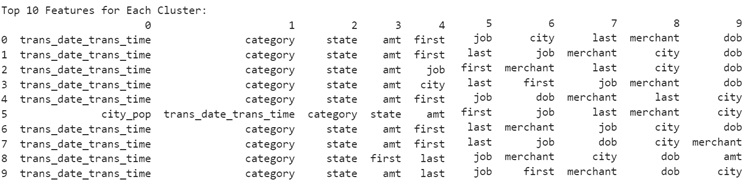

Transaction date and time, purchase category, state and amount are the four most important features in nearly all clusters. The only exception was cluster #5, where the city population was the most important feature.  

After that, the first and last names of the credit card holder, as well as merchant where the transaction was made, city, and date of birth of the credit card holder, are the common features present in all clusters with varying degrees of contribution. This goes along with the analysis from assignment 8.


CLUSTER WITH HIGH INCIDENCE OF FRAUD
Cluster #8 is, by far, the cluster with the highest incidence of fraud transactions, both in absolute terms, and as a percentage of the total transactions in the cluster.  

Cluster #8 includes the following top ten features in descending order of contribution: transaction date/time, category, state, first and last name, job, merchant, city, date of birth, and amount.  

LIST OF TRANSACTIONS FOR AUDIT  
A new dataframe "audit_dataset" was created for audit purposes. This datasets includes all the rows from the original dataset where the cluster feature = 8. I chose this cluster because it captured transaction data that was marked as fraudulent at a ratio of 33% from the total transactions in the cluster. The rest of the clusters captured 5% or less fraud transactions. This is interesting because the "is_fraud" feature itself was not included in the clustering algorithm, therefore cluster #8 seems to be a good representation of transactions that actually resulted in fraud.



<u>Code:</u>



Fraud ratio for each cluster:
   Cluster  TotalRows  FraudRows  FraudRatio
0        3     269662        715    0.002651
1        7     233459        791    0.003388
2        4     230492        708    0.003072
3        0     216887        649    0.002992
4        9     215804        605    0.002803
5        2     209965        563    0.002681
6        1     206457        547    0.002649
7        6     198354        516    0.002601
8        5      58246        199    0.003417
9        8      13068       4358    0.333486

Feature Contributions to Clusters:
   trans_date_trans_time      merchant      category           amt  \
0          822704.648073 -87182.433919 -87519.703778 -87464.805378   
1          824552.955947 -87182.038739 -87519.647928 -87462.738881   
2          824680.344803 -87182.239402 -87519.701005 -87462.315490   
3          823824.262736 -87183.190118 -87519.698789 -87465.052163   
4          820872.662452 -87184.852297 -87519.756842 -87467.495427   
5          822709.

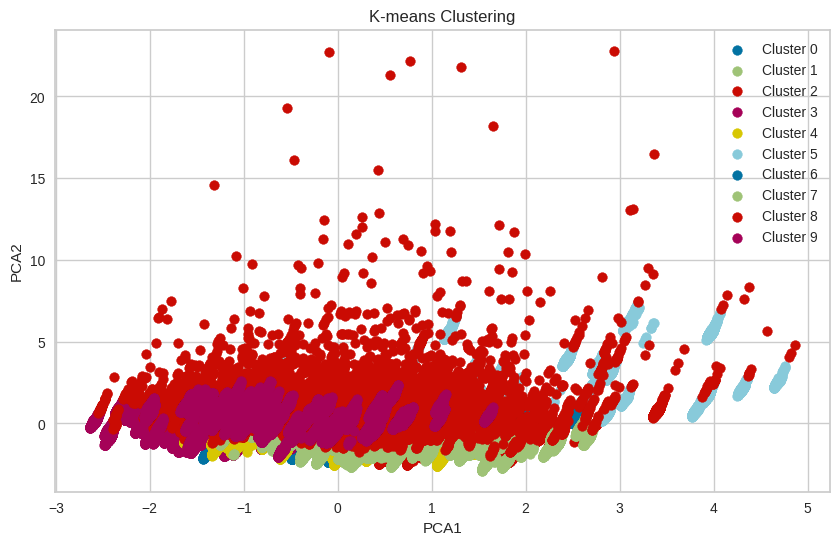

        trans_date_trans_time                             merchant  \
232       2019-01-01 02:54:10                   fraud_Kassulke PLC   
296       2019-01-01 03:51:28                  fraud_Heathcote LLC   
511       2019-01-01 06:43:54              fraud_McGlynn-Heathcote   
723       2019-01-01 09:23:55           fraud_Rippin, Kub and Mann   
764       2019-01-01 09:51:52                     fraud_Metz-Boehm   
...                       ...                                  ...   
1851228   2020-12-31 17:17:41                      fraud_Thiel Ltd   
1851679   2020-12-31 19:43:11  fraud_Douglas, Schneider and Turner   
1851904   2020-12-31 21:08:01                   fraud_Mayert Group   
1852170   2020-12-31 22:36:21             fraud_Gleason-Macejkovic   
1852312   2020-12-31 23:30:29             fraud_Gleason-Macejkovic   

             category      amt      first       last            city state  \
232      shopping_net  1055.47    Phillip   Delacruz           Iliff    CO   
296

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer


#Read the input data from the csv file. Remove first column (duplicate index).
transactions_df = pd.read_csv('transactions.csv')
transactions_df = transactions_df.drop(transactions_df.columns[0],axis=1)


#Remove categorical data, deemed less relevant based on analysis from assignment 8.
transactions_df = transactions_df.drop(['cc_num'], axis=1)
transactions_df = transactions_df.drop(['street'], axis=1)
transactions_df = transactions_df.drop(['trans_num'], axis=1)
transactions_df = transactions_df.drop(['unix_time'], axis=1)
transactions_df = transactions_df.drop(['merch_lat'], axis=1)
transactions_df = transactions_df.drop(['merch_long'], axis=1)
transactions_df = transactions_df.drop(['lat'], axis=1)
transactions_df = transactions_df.drop(['long'], axis=1)
transactions_df = transactions_df.drop(['sex'], axis=1)

#Splitting the data into X and y. The "is_fraud" feature is not considered in the clustering.
X = transactions_df.drop(['is_fraud'], axis=1)
y = transactions_df['is_fraud']

#Encode and scale the data
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
                
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)


# Find optimal K. Commented out because it takes exceedingly high running time.
#kmeans = KMeans()
#visualizer = KElbowVisualizer(model, k=(2,3),metric='silhouette', timings= True)
#visualizer.fit(X_scaled)        # Fit the data to the visualizer
#visualizer.show()        # Finalize and render the figure


# K-MEANS CLUSTERING
# Chose to run K=10 to clusters. By doing this, I obtained a cluster with significantly more fraudulent transactions than the rest. This is Cluster #8.
# With K<8, cluster distribution was relatively similar, with only one or two clusters with less fraud transactions.
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original data
X['Cluster'] = clusters

# Principal Component Analysis
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

X['PCA1'] = pca_result[:, 0]
X['PCA2'] = pca_result[:, 1]

# Cluster analysis to get feature contributions and most relevant features
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_results = pd.DataFrame(cluster_centers, columns=X.columns[:-3])
cluster_results['Total_Contribution'] = cluster_results.sum(axis=1)

mean_values = scaler.inverse_transform(X_scaled).mean()
feature_contributions = pd.DataFrame(cluster_centers - mean_values, columns=X.columns[:-3])

top_n_features = 10 
top_features_df = pd.DataFrame(index=range(num_clusters), columns=range(top_n_features))

for cluster in range(num_clusters):
    sorted_features = feature_contributions.loc[cluster].abs().sort_values(ascending=False)
    top_features = sorted_features.head(top_n_features).index.tolist()
    top_features_df.loc[cluster] = top_features

fraud_by_cluster = X[['Cluster']].copy()
fraud_by_cluster['Fraud'] = y
rows_by_cluster = fraud_by_cluster['Cluster'].value_counts().reset_index()
rows_by_cluster.columns = ['Cluster', 'TotalRows'] 
fraud_by_cluster_counts = fraud_by_cluster.groupby('Cluster')['Fraud'].sum().reset_index()

fraud_ratio_by_cluster = pd.merge(rows_by_cluster, fraud_by_cluster_counts, on='Cluster', how='left')
fraud_ratio_by_cluster.columns = ['Cluster', 'TotalRows', 'FraudRows']
fraud_ratio_by_cluster['FraudRatio'] = fraud_ratio_by_cluster['FraudRows'] / fraud_ratio_by_cluster['TotalRows']

# Print or use the resulting DataFrame
print("\nFraud ratio for each cluster:")
print(fraud_ratio_by_cluster)

#Print the results
#print("\nCluster Centers and Contributions:")
#print(cluster_results)

print("\nFeature Contributions to Clusters:")
print(feature_contributions)

print("\nTop {} Features for Each Cluster:".format(top_n_features))
print(top_features_df)

print("\nNumber of Rows for each cluster:")
print(rows_by_cluster)

print("\nNumber of Fraud occurrences for each cluster:")
print(fraud_by_cluster_counts)

print("\nRatio of Frauds to Total Rows by Cluster:")
print(fraud_ratio_by_cluster)


# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_data = X[X['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')

plt.title('K-means Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()


# Create new dataset for audit
audit_dataset = X[X['Cluster'] == 8].copy()

**Section 2 (Hyper-parameter tuning for Random Forest)**   
Analyze the behavior of a Random Forest model as you vary the values of its hyper parameters:

max_depth  
n_estimators  
max_features  

Graph the performance of each hyper-parameter as you vary their values. Use at least 4 different values for each hyper-parameter. Finally, summarize how you would design a Random Forest model using the results of your analysis.

<u>Answer:</u>

1) Using the same transactions dataset. However, I kept only the first 50,000 rows from the dataframe. I tried to run RandomForestClassifier using the entire dataset and the running time increased significantly, and execution did not stop at least after 15 minutes.
2) Based on the analysis, the following parameters yield optimal and accurate results:
max_depth = 9
n_estimators = 10
max_features = 4

The logic behind choosing the above parameter values is the smallest value that gets close to 100% accurracy or that "stabilizes" near 100%.


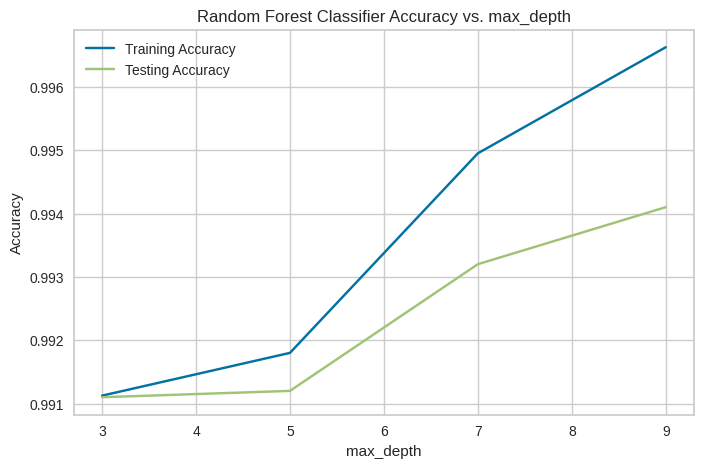

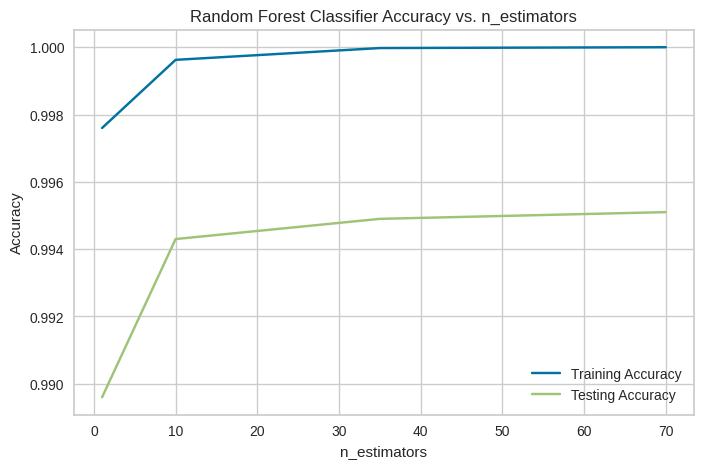

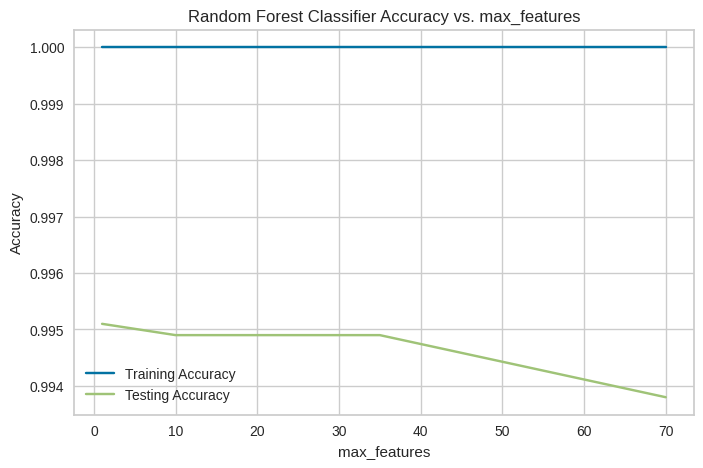

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


transactions_df = pd.read_csv('transactions.csv')
transactions_df = transactions_df.drop(transactions_df.columns[0],axis=1) #Drop the first column
transactions_df = transactions_df.head(50000)

X = transactions_df.drop(['is_fraud'], axis=1)
y = transactions_df['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Label Encoding
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()
for col in X_train_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train_encoded[col] = le.fit_transform(X_train_encoded[col])
for col in X_test_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_test_encoded[col] = le.fit_transform(X_test_encoded[col])       
    
#Scaling                
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.fit_transform(X_test_encoded)


#Testing RandomForestClassifier for different values of max_depth, n_estimators, and max_features  
train_accuracies = []
test_accuracies = []
max_depth_values = [3, 5, 7, 9]
n_estimators_values = [1, 10, 35, 70]
max_features_values = [4, 10, 15, 21]


#max_depth analysis
for max_depth in max_depth_values:
    classifier = RandomForestClassifier(max_depth=max_depth, random_state=42)
    classifier.fit(X_train_scaled, y_train)
    
    train_accuracy = classifier.score(X_train_scaled, y_train)
    train_accuracies.append(train_accuracy)
    
    test_accuracy = classifier.score(X_test_scaled, y_test)
    test_accuracies.append(test_accuracy)
    
plt.figure(figsize=(8, 5))
plt.plot(max_depth_values, train_accuracies, label='Training Accuracy')
plt.plot(max_depth_values, test_accuracies, label='Testing Accuracy')
plt.title('Random Forest Classifier Accuracy vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#n_estimators analysis
train_accuracies = []
test_accuracies = []
for n_estimators in n_estimators_values:
    classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    classifier.fit(X_train_scaled, y_train)
    
    train_accuracy = classifier.score(X_train_scaled, y_train)
    train_accuracies.append(train_accuracy)
    
    test_accuracy = classifier.score(X_test_scaled, y_test)
    test_accuracies.append(test_accuracy)
    
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_values, train_accuracies, label='Training Accuracy')
plt.plot(n_estimators_values, test_accuracies, label='Testing Accuracy')
plt.title('Random Forest Classifier Accuracy vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#max_features analysis
train_accuracies = []
test_accuracies = []
for max_features in max_features_values:
    classifier = RandomForestClassifier(max_features=max_features, random_state=42)
    classifier.fit(X_train_scaled, y_train)
    
    train_accuracy = classifier.score(X_train_scaled, y_train)
    train_accuracies.append(train_accuracy)
    
    test_accuracy = classifier.score(X_test_scaled, y_test)
    test_accuracies.append(test_accuracy)
    
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_values, train_accuracies, label='Training Accuracy')
plt.plot(n_estimators_values, test_accuracies, label='Testing Accuracy')
plt.title('Random Forest Classifier Accuracy vs. max_features')
plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.legend()
plt.show()